In [ ]:
pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 17 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=80c25d1d5ac061ed9acdee52957b6679f4e1ca18f3d0241dfae1a6edf8bda323
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout      #things we need to import for the code  
from tensorflow.keras.models import Model                                       
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import decode_predictions
import numpy as np
import pandas as pd
import os
import cv2                   
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive     #This allows us to access folders from Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path="/content/drive/MyDrive/Train"       
test_path="/content/drive/MyDrive/Test"         #folder locations on drive
val_path="/content/drive/MyDrive/Validation"

In [ ]:
x_train=[] #image resizing for train folder

for folder in os.listdir(train_path):


    sub_path=train_path+"/"+folder

    print(sub_path)
    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        print(image_path)

        img_arr=cv2.imread(image_path)
        print(img_arr)
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
x_test=[] #image resizing for test folder

for folder in os.listdir(test_path):


    sub_path=test_path+"/"+folder

    print(sub_path)
    for img in os.listdir(sub_path):
      
        image_path=sub_path+"/"+img
        print(image_path)

        img_arr=cv2.imread(image_path)
        print(img_arr)
        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
x_val=[] #image resizing for val folder

for folder in os.listdir(val_path):


    sub_path=val_path+"/"+folder

    print(sub_path)
    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        print(image_path)

        img_arr=cv2.imread(image_path)
        print(img_arr)
        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

Streaming output truncated to the last 5000 lines.
  [136 131 128]
  [134 131 127]
  ...
  [164 159 150]
  [166 160 149]
  [167 161 150]]

 ...

 [[ 97  93  99]
  [ 97  93  99]
  [ 96  95  99]
  ...
  [123 124 120]
  [122 123 121]
  [121 122 120]]

 [[ 97  93  99]
  [ 98  94 100]
  [ 96  95  99]
  ...
  [124 123 119]
  [124 122 121]
  [123 121 120]]

 [[ 98  94 100]
  [ 98  94 100]
  [ 96  95  99]
  ...
  [124 123 119]
  [124 122 121]
  [124 122 121]]]
/content/drive/MyDrive/Train/Ahmed Noor/WIN_20220803_12_13_54_Pro.jpg
[[[128 131 129]
  [129 132 130]
  [131 132 130]
  ...
  [161 160 150]
  [161 161 149]
  [161 161 149]]

 [[129 132 130]
  [129 132 130]
  [131 132 130]
  ...
  [162 161 151]
  [161 160 150]
  [161 161 149]]

 [[131 132 130]
  [131 132 130]
  [132 133 131]
  ...
  [162 161 151]
  [163 161 151]
  [163 161 151]]

 ...

 [[ 93  98  99]
  [ 92  97  98]
  [ 90  98  98]
  ...
  [118 125 122]
  [119 126 123]
  [119 126 123]]

 [[ 89  98 101]
  [ 88  97 100]
  [ 88  97 100]
  .

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255) #rescaling
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path, #target size is essentially the size of input image
                                                 target_size = (224,224),
                                                 batch_size = 32, #batch size is the number of samples before the model is updated
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 519 images belonging to 9 classes.
Found 9 images belonging to 9 classes.
Found 53 images belonging to 9 classes.


In [ ]:
train_y=training_set.classes #training the. three folders
test_y=test_set.classes
val_y=val_set.classes
print(training_set.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

In [ ]:
training_set.class_indices #indices for each of the students

{'Aarav Maruq': 0,
 'Aditya Raghav': 1,
 'Ahmed Noor': 2,
 'Aswata Narayan': 3,
 'Brandon Fernandes': 4,
 'Denver Jonathan Pereira': 5,
 'Irbaz Kapadia': 6,
 'Shiv Patel': 7,
 'Vybhav Dijesh': 8}

In [ ]:
train_y.shape,test_y.shape,val_y.shape  

((519,), (9,), (53,))

In [ ]:
IMAGE_SIZE = [224, 224] #VGG-19 is CNN that is 19 layers deep. It can load a pretrained version of the network trained on more than a million images. It can classify the images
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary() #is textual and includes info about layers and their order in the model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile( #compiles the model
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
'tensorflow==2.7.0',
'tf-models-official==2.7.0',
'tensorflow_io==0.23.1',

('tensorflow_io==0.23.1',)

In [ ]:
history = model.fit( #Most important part of the code. We chose epoch as 15 to make it most accurate
  training_set,
  validation_data=val_set,
  epochs = 15,
  batch_size = 32,shuffle=True,)

Epoch 1/15
17/17 [==============================] - 371s 22s/step - loss: 1.2691 - accuracy: 0.6513 - val_loss: 0.0904 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 368s 22s/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 366s 22s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 369s 22s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 367s 22s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 367s 22s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 368s 22s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 

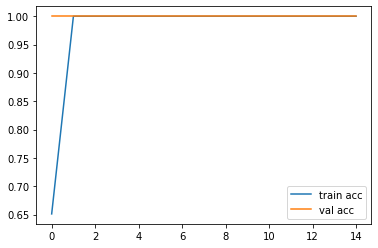

In [ ]:
plt.plot(history.history['accuracy'], label='train acc') #plots graphs regarding our model's accuracy

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

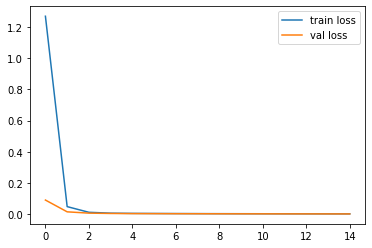

In [ ]:
plt.plot(history.history['loss'], label='train loss') #plots graphs regarding our model's accuracy
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
print(training_set.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

In [ ]:
train_y.shape,test_y.shape,val_y.shape  

((519,), (9,), (53,))

In [ ]:
y_pred=model.predict(test_x) #predicts model
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
print(classification_report(y_pred,test_y)) #prints classification report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



In [ ]:
print(confusion_matrix(y_pred,test_y)) #determines performance

[[0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]


In [ ]:
print(train_x[0][0][0])

[0.40392157 0.4        0.40784314]


In [48]:
attendance = [["Aarav Maruq","absent"],["Aditya Raghav","absent"],["Ahmed Noor","absent"],["Aswata Narayan","absent"],["Brandon Fernandes","absent"],["Denver Jonathan Pereira","absent"],["Irbaz Kapadia","absent"],["Shiv Patel","absent"],["Vybhav Dijesh","absent"]] #our array which will be exported to google sheets

In [52]:
img_arr=cv2.imread("/content/drive/MyDrive/TESTNG IMAGES/Irbaz Kapadia/WIN_20220811_12_27_37_Pro.jpg")
img_arr=cv2.resize(img_arr,(224,224))
img_arr = img_arr.reshape((1, 224, 224, 3))
x = model(img_arr) 
#print(x.numpy().argmax())
if(x.numpy().argmax()) == 0:
  print ("Aarav Maruq = present")
  attendance[0][1] = "present" 
if(x.numpy().argmax()) == 1:
  print ("Aditya Raghav = present") 
  attendance[1][1] = "present" 
if(x.numpy().argmax()) == 2:
  print ("Ahmed Noor = present") 
  attendance[2][1] = "present" 
if(x.numpy().argmax()) == 3:
  print ("Aswata Narayan = present") 
  attendance[3][1] = "present" 
if(x.numpy().argmax()) == 4:
  print ("Brandon Fernandes = present") 
  attendance[4][1] = "present" 
if(x.numpy().argmax()) == 5:
  print ("Denver Jonathan Pereira = present")
  attendance[5][1] = "present"  
if(x.numpy().argmax()) == 6:
  print ("Irbaz Kapadia = present")
  attendance[6][1] = "present"  
if(x.numpy().argmax()) == 7:
  print ("Shiv Patel = present")
  attendance[7][1] = "present"  
if(x.numpy().argmax()) == 8:
  print ("Vybhav Dijesh = present")
  attendance[8][1] = "present"                    

Irbaz Kapadia = present


In [53]:
print (attendance)

[['Aarav Maruq', 'absent'], ['Aditya Raghav', 'absent'], ['Ahmed Noor', 'absent'], ['Aswata Narayan', 'absent'], ['Brandon Fernandes', 'absent'], ['Denver Jonathan Pereira', 'absent'], ['Irbaz Kapadia', 'present'], ['Shiv Patel', 'present'], ['Vybhav Dijesh', 'absent']]


In [ ]:
{'Aarav Maruq': 0,
 'Aditya Raghav': 1,
 'Ahmed Noor': 2,
 'Aswata Narayan': 3,
 'Brandon Fernandes': 4,
 'Denver Jonathan Pereira': 5,
 'Irbaz Kapadia': 6,
 'Shiv Patel': 7,
 'Vybhav Dijesh': 8}

{'Aarav Maruq': 0,
 'Aditya Raghav': 1,
 'Ahmed Noor': 2,
 'Aswata Narayan': 3,
 'Brandon Fernandes': 4,
 'Denver Jonathan Pereira': 5,
 'Irbaz Kapadia': 6,
 'Shiv Patel': 7,
 'Vybhav Dijesh': 8}

In [ ]:
path = '/content/drive/MyDrive/student_images'

In [54]:
import pandas as pds #transfers array to google sheets
df = pds.DataFrame(attendance)
filepath = '/content/drive/MyDrive/attendance.xlsx'
df.to_excel(filepath, index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')